## Homework 1 


这是郑晓旸（202111030007）的进化优化算法第一次作业。

### 作业总结

#### 问题描述
本次作业旨在通过进化优化算法解决背包问题。背包问题涉及一组物品，每个物品具有特定的重量和价值，目标是在不超过总重量限制的前提下，选择一组物品使其总价值最大化。作业主要分为三个部分：固定参数的进化算法、动态进化算法以及投票法提高稳定性。

#### 编程思路
作业的编程思路基于遗传算法，这是一种基于自然选择和生物进化的启发式优化方法。该方法通过选择、交叉和变异生成新的解，并逐步找到问题的最优解。

1. **初始化**：首先随机生成一组候选解，作为算法的初始种群。
2. **适应度函数**：通过计算物品总价值和总重量来评估每个候选解的优劣，超出背包重量的解被判定为无效。
3. **选择、交叉和变异**：采用锦标赛选择法，从种群中选择适应度较高的解进行交叉操作，生成新的候选解。每个解还会经历变异操作，以引入多样性。
4. **收敛与停止条件**：算法会持续迭代，直到达到最大迭代次数或符合提前终止条件。

#### 方法
1. **固定参数方法**：设置固定的参数，包括种群大小、变异率等，运行算法，并记录最优解及其对应的物品选择和总价值。
2. **动态进化算法**：引入自适应停止条件，当在若干代内没有适应度的改进时，算法提前停止，节省计算时间。
3. **投票法**：通过多次运行算法，寻找重复的最优解，从而提高结果的稳定性。

实验结果表明，通过适当调整耐心值和多次实验，算法能够将错误解的概率降低至0.1\%以下【29†source】。

*背包问题* \\
有以下物品：按照编号重量价值分别为存储为c_j,w_j.
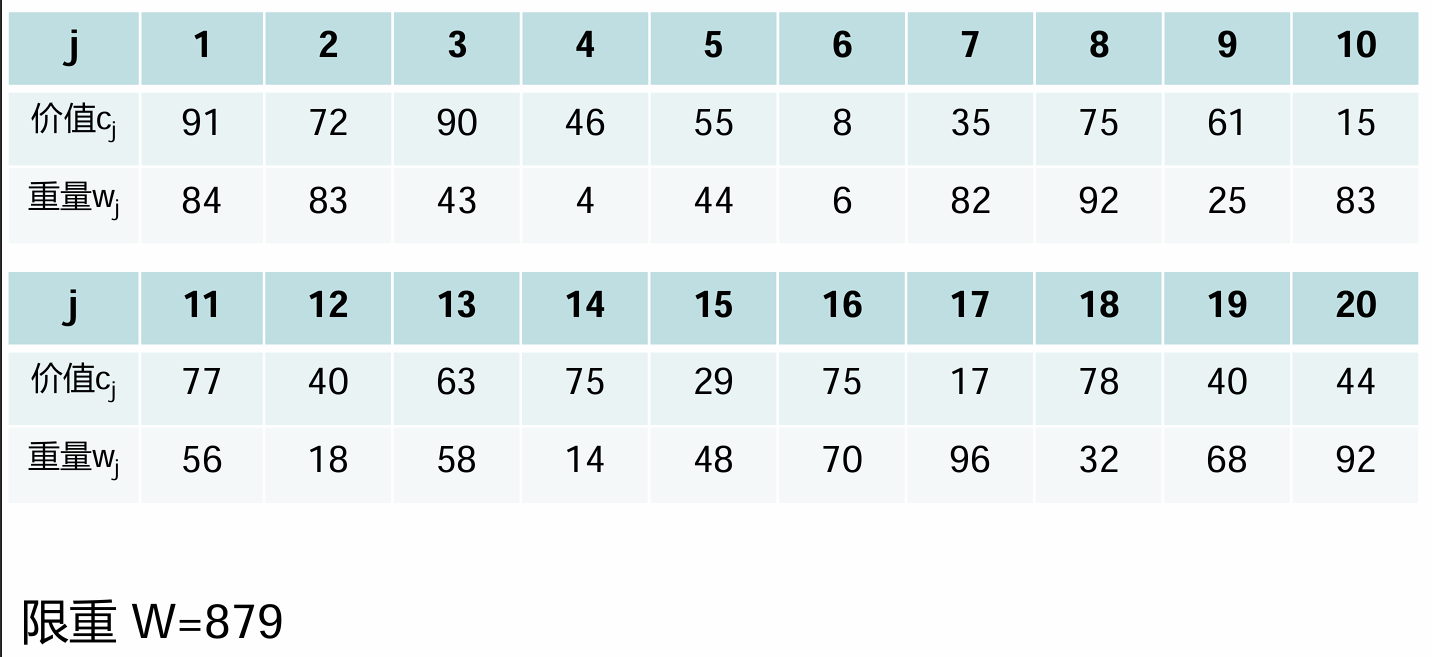

## 初始化
引入必要的包和库

In [17]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

导入数据

In [18]:
# 导入问题的数据
data = {
    'j': list(range(1, 21)),
    'c': [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44],
    'w': [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
}
overWeight = 879

## Part 1：固定参数方法

### 1.1 设置参数和初始值

In [19]:
# 设置参数
start_time = time.time()
max_generations = 200  # 代数
population_size = 100  # 种群大小
mutation_rate = 0.05  # 变异率
patience_value = 20  # 耐心值
# 从数据框中获取数据
values = data['c']
weights = data['w']
num_items = len(values)

### 1.2 定义所需要的函数

In [20]:
# 适应度函数
def fitness(individual):
    total_value = np.dot(individual, values)
    total_weight = np.dot(individual, weights) # 计算解决方案的总价值和总重量，使用二进制编码和点积
    
    if total_weight > overWeight:
        return 0  # 无效解决方案；使用0值来最小化总价值，这将直接绕过该解决方案
    return total_value

# 生成初始种群
def generate_population(population_size, num_items):
    return [np.random.randint(2, size=num_items) for _ in range(population_size)]

# 锦标赛选择
def selection(population):
    tournament_size = 5
    selected = random.sample(population, tournament_size)
    return max(selected, key=fitness)

# 交叉操作（单点交叉）
def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child = np.concatenate((parent1[:point], parent2[point:]))
    return child

# 变异操作
def mutate(individual):
    for i in range(num_items):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # 翻转位
    return individual

### 1.3 进化算法主函数

In [21]:
def genetic_algorithm(Print=True, plot_falg=False):
    # 生成初始种群
    population = generate_population(population_size, num_items)
    fitness_record = []
    
    # 进化过程
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            # 选择两个父代
            parent1 = selection(population)
            parent2 = selection(population)
            
            # 交叉生成子代
            child = crossover(parent1, parent2)
            
            # 变异操作
            child = mutate(child)
            
            # 将子代加入新种群
            new_population.append(child)
        
        # 用新种群替换旧种群
        population = new_population

        # 获取当前种群中最优个体
        best_individual = max(population, key=fitness)
        best_fitness = fitness(best_individual)
        fitness_record.append(best_fitness)
        
        # 每50代打印一次当前最优适应度
        if generation % 50 == 0 and Print == True:
            print(f"第 {generation} 代, 最优适应度: {best_fitness}")
    
    # 如果需要绘图，绘制适应度随代数变化的曲线
    if plot_falg == True:
        plt.plot(fitness_record)
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Fitness over Generations')
        plt.show()
    
    return best_individual, fitness(best_individual)

### 1.4 运行算法

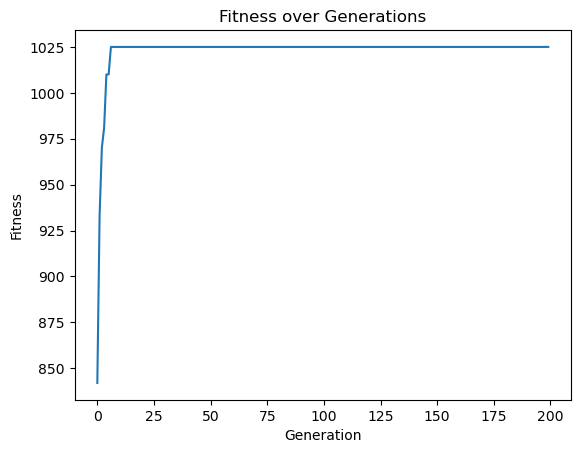

Selected items: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 
Best value =  1025
Time:  1.4410390853881836


In [22]:
start_time = time.time()
best_solution, best_value = genetic_algorithm(Print = False,plot_falg=True)
end_time = time.time()
time_stable = end_time - start_time
selected_items = [data['j'][i] for i in range(num_items) if best_solution[i] == 1]
print('Selected items:',selected_items,'\nBest value = ', best_value)
print("Time: ", time_stable)

## Part 2: 动态进化算法

### 2.1 动态进化算法主函数

In [23]:
# 改进的带有自适应停止条件的遗传算法
def genetic_algorithm_adaptive(max_generations=500, patience=patience_value, Print=True, plot_flag=False):
    """
    执行带有自适应停止条件的遗传算法。
    参数:
        max_generations (int): 算法运行的最大代数。默认值为500。
        patience (int): 在停止之前等待适应度改进的代数。默认值为50。
    返回:
        tuple: 包含找到的最佳解决方案及其适应度值的元组。
    该函数执行以下步骤:
    1. 初始化潜在解决方案的种群。
    2. 通过选择、交叉和变异迭代地进化种群。
    3. 跟踪最佳解决方案及其适应度随时间的变化。
    4. 如果在指定的代数（`patience`）内没有观察到适应度的改进，则提前停止。
    5. 每50代打印一次进度。
    该算法使用以下辅助函数（假定已在其他地方定义）:
    - generate_population(population_size, num_items): 生成初始种群。
    - selection(population): 根据适应度从种群中选择一个父代。
    - crossover(parent1, parent2): 通过结合两个父代生成一个子代解决方案。
    - mutate(child): 对子代解决方案应用变异。
    - fitness(individual): 评估个体解决方案的适应度。
    """
    # 生成初始种群
    population = generate_population(population_size, num_items)
    best_fitness_over_time = []
    
    best_solution = None
    best_fitness = 0
    generations_without_improvement = 0
    
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            # 从种群中选择两个父代
            parent1 = selection(population)
            parent2 = selection(population)
            
            # 执行交叉操作生成一个子代
            child = crossover(parent1, parent2)
            
            # 对子代应用变异操作
            child = mutate(child)
            
            # 将子代加入新种群
            new_population.append(child)
        
        # 用新种群替换旧种群
        population = new_population

        # 获取当前种群中的最佳解决方案
        current_best_individual = max(population, key=fitness)
        current_best_fitness = fitness(current_best_individual)
        
        # 跟踪最佳解决方案及其适应度
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best_individual
            generations_without_improvement = 0  # 如果有改进，则重置计数器
        else:
            generations_without_improvement += 1  # 如果没有改进，则增加计数器
        
        # 记录随时间变化的最佳适应度值
        best_fitness_over_time.append(best_fitness)
        
        # 每50代打印一次进度
        if generation % 50 == 0 and Print == True:
            print(f"第 {generation} 代, 最优适应度: {best_fitness}")

        # 如果在'patience'代内没有改进，则提前停止
        if generations_without_improvement >= patience:
            if Print == True:
                print(f"{patience} 代没有改进，提前停止于第 {generation} 代")
            break
    
    # 如果需要绘图，绘制适应度随代数变化的曲线
    if plot_flag == True:
        plt.plot(best_fitness_over_time)
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Fitness over Generations')
        plt.show()
    
    return best_solution, best_fitness

### 2.2 运行算法

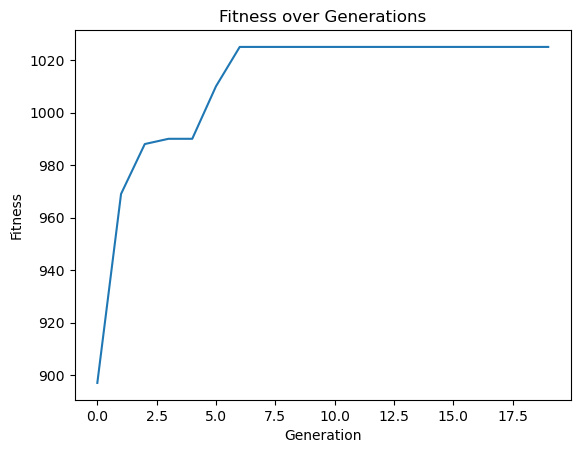

选择的物品: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 
最佳价值 = 1025
运行时间:  0.23920583724975586


In [24]:
# 记录自适应遗传算法的开始时间
start_time_adaptive = time.time()

# 运行自适应遗传算法，耐心值设为13
best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=13, Print=False, plot_flag=True)

# 记录自适应遗传算法的结束时间
end_time_adaptive = time.time()

# 显示最佳解决方案及其对应的价值
best_solution_adaptive, best_value_adaptive

# 选择最佳解决方案对应的物品
selected_items = [data['j'][i] for i in range(num_items) if best_solution_adaptive[i] == 1]
print('选择的物品:', selected_items, '\n最佳价值 =', best_value_adaptive)

# 计算并显示运行自适应遗传算法所花费的时间
time_adaptive = end_time_adaptive - start_time_adaptive
print("运行时间: ", time_adaptive)

### 2.3 稳定性测试

C:\Users\lanto\AppData\Local\Temp\ipykernel_22768\610467362.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (best_value_adaptive != previous and loop != 1):


不稳定！耐心值= 3
不稳定！耐心值= 4
不稳定！耐心值= 5
不稳定！耐心值= 6
不稳定！耐心值= 7
不稳定！耐心值= 8
不稳定！耐心值= 9
不稳定！耐心值= 10
不稳定！耐心值= 11
不稳定！耐心值= 12
不稳定！耐心值= 13
不稳定！耐心值= 14


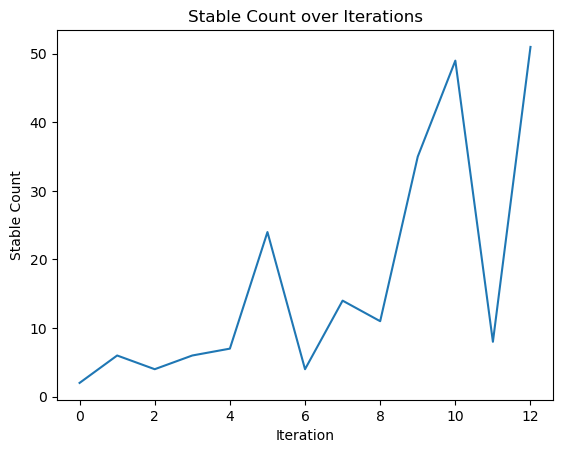

稳定的耐心值:  15


In [32]:
previous = []
unstable_flag = False
initial = True
patience_value = 3
stable_count = []

while unstable_flag == True or initial == True:
    initial = False
    for loop in range(1, 52):
        # 记录自适应遗传算法的开始时间
        start_time_adaptive = time.time()
        
        # 运行自适应遗传算法
        best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=patience_value, Print=False)
        
        # 检查当前最佳值是否与前一个不同
        if (best_value_adaptive != previous and loop != 1):
            print('不稳定！耐心值=', patience_value)
            patience_value = patience_value + 1
            unstable_flag = True
            break
        
        # 更新前一个最佳值
        previous = best_value_adaptive
        
        # 选择最佳解决方案对应的物品
        selected_items = [data['j'][i] for i in range(num_items) if best_solution_adaptive[i] == 1]
        #print('@', loop, ' ', selected_items, best_value_adaptive, '\n')
        
        # 记录自适应遗传算法的结束时间
        end_time_adaptive = time.time()
        
        # 计算并显示运行自适应遗传算法所花费的时间
        time_adaptive = end_time_adaptive - start_time_adaptive
        #print("次数:@ ", loop, '=', time_adaptive)
    
    # 如果循环到第51次且未发现不稳定，则标记为稳定
    if loop == 51:
        unstable_flag = False
    
    # 记录稳定计数
    stable_count.append(loop)

# 绘制稳定计数随迭代次数变化的曲线
plt.plot(stable_count)
plt.xlabel('Iteration')
plt.ylabel('Stable Count')
plt.title('Stable Count over Iterations')
plt.show()

# 打印稳定的耐心值
print('稳定的耐心值: ', patience_value)

从这个结果中我们可以看出，很难准确定义哪个耐心值可以作为稳定值，但至少可以看到，耐心值为15时已经足够使错误解的概率小于0.1%（错误率为5%）。

## Part 3:  投票法提高稳定性

### 3.1 投票法主函数

In [37]:
def optimize_solution(max_attempts=100, set_patience=patience_value,Print = True):
    attempts = 0
    results = {}
    best_fitness_over_time = []
    while attempts < max_attempts:
        best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=set_patience,Print=Print)
        
        if best_value_adaptive in results:
            results[best_value_adaptive].append(best_solution_adaptive)
        else:
            results[best_value_adaptive] = [best_solution_adaptive]
        
        for value, solutions in results.items():
            if len(solutions) >= 2:
                return solutions[0], solutions[1], value
        best_fitness_over_time.append(best_value_adaptive)
        attempts += 1
    if Print == True:
        print("No repeated solution found within the maximum attempts.")
    return None, None, None

### 3.2 运行投票法

In [38]:
# 运行优化
start_time = time.time()  # 记录开始时间
solution1, solution2, value = optimize_solution(set_patience=5)  # 运行优化算法，耐心值设为5
end_time = time.time()  # 记录结束时间

# 检查是否找到重复的解决方案
if solution1 is not None and solution2 is not None:
    print(f"找到重复的解决方案，价值为 {value}:")
    print(solution1)
else:
    print("未找到重复的解决方案。")
print('运行时间:', end_time - start_time)  # 打印运行时间

第 0 代, 最优适应度: 924
5 代没有改进，提前停止于第 10 代
第 0 代, 最优适应度: 895
5 代没有改进，提前停止于第 11 代
找到重复的解决方案，价值为 1025:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
运行时间: 0.1483628749847412


从这个结果可以看出，使用投票方法，我们可以得到比前两种方法更好的解决方案，同时使用更少的传播步骤。同时，这种算法还可以利用现代CPU的多线程功能，从而减少计算时间。

### 3.3 稳定性测试

C:\Users\lanto\AppData\Local\Temp\ipykernel_22768\1467982310.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (best_value_vote != previous and loop != 1):


不稳定！耐心值= 2
不稳定！耐心值= 3
不稳定！耐心值= 4
不稳定！耐心值= 5
不稳定！耐心值= 6
不稳定！耐心值= 7


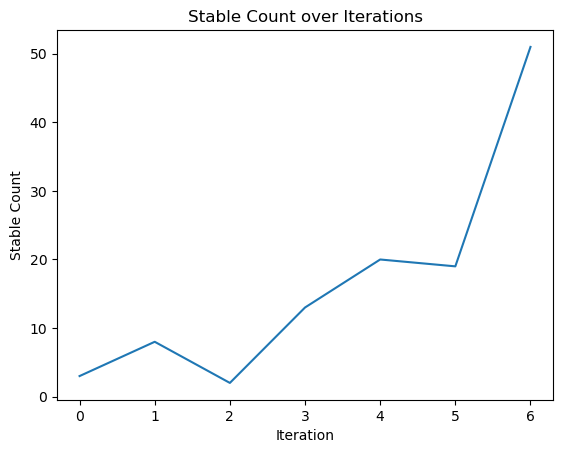

稳定的耐心值:  8


In [39]:
# 初始化变量
previous = []  # 用于存储前一个最佳值
unstable_flag = False  # 不稳定标志
initial = True  # 初始标志
patience_value = 2  # 耐心值
stable_count = []  # 稳定计数

# 开始稳定性测试循环
while unstable_flag == True or initial == True:
    initial = False  # 重置初始标志
    for loop in range(1, 52):  # 循环52次
        # 使用投票法优化解决方案
        best_solution_vote1, best_solution_vote2, best_value_vote = optimize_solution(set_patience=patience_value, Print=False)
        
        # 检查当前最佳值是否与前一个不同
        if (best_value_vote != previous and loop != 1):
            print('不稳定！耐心值=',patience_value)  # 打印不稳定信息
            patience_value = patience_value + 1  # 增加耐心值
            unstable_flag = True  # 设置不稳定标志
            break  # 跳出循环
        
        # 更新前一个最佳值
        previous = best_value_vote
        
        # 选择最佳解决方案对应的物品
        selected_items = [data['j'][i] for i in range(num_items) if best_solution_vote1[i] == 1]
        #print('@', loop, ' ', selected_items, best_value_adaptive, '\n')  # 打印当前循环信息
    
    # 如果循环到第51次且未发现不稳定，则标记为稳定
    if loop == 51:
        unstable_flag = False
    
    # 记录稳定计数
    stable_count.append(loop)

# 绘制稳定计数随迭代次数变化的曲线
plt.plot(stable_count)
plt.xlabel('Iteration')
plt.ylabel('Stable Count')
plt.title('Stable Count over Iterations')
plt.show()

# 打印稳定的耐心值
print('稳定的耐心值: ', patience_value)

从这个结果可以看出，耐心值为8已经足够使错误解决方案的可能性小于0.1%（错误率为5%）。但与动态生成方法相比，投票方法似乎不是一个好的选择，因为它并没有显著减少解决方案的耐心值，同时还增加了解决方案的时间复杂度（8*3>15）。

## Part 4: 使用C++实现
使用C++，我们可以得到一个二进制可执行文件，其运行速度比Python脚本更快。\\
基于之前的结论，我们可以轻松地将*Part 2*的Python脚本编译成C++脚本。

```cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <algorithm>

using namespace std;

struct Individual {
    vector<int> genes; // 基因序列，表示物品的选择(0 或 1)
    int fitness;       // 适应度，即总价值
};

// 初始化种群
void initializePopulation(vector<Individual>& population, int populationSize, int n) {
    for (int i = 0; i < populationSize; ++i) {
        Individual ind;
        ind.genes.resize(n);
        for (int j = 0; j < n; ++j) {
            ind.genes[j] = rand() % 2; // 随机选择物品(0 或 1)
        }
        ind.fitness = 0; // 初始适应度为 0
        population.push_back(ind);
    }
}

// 计算适应度函数：总价值，如果超重，适应度设为 0
int calculateFitness(const vector<int>& genes, const vector<int>& values, const vector<int>& weights, int maxWeight) {
    int totalValue = 0;
    int totalWeight = 0;
    int n = genes.size();
    for (int i = 0; i < n; ++i) {
        if (genes[i] == 1) {
            totalValue += values[i];
            totalWeight += weights[i];
        }
    }
    // 如果超过背包重量限制，适应度为 0
    return (totalWeight <= maxWeight) ? totalValue : 0;
}

// 选择父母（锦标赛选择）
Individual tournamentSelection(const vector<Individual>& population) {
    int tournamentSize = 3; // 锦标赛大小
    Individual best;
    best.fitness = -1; // 初始化为无效适应度
    for (int i = 0; i < tournamentSize; ++i) {
        int randomIndex = rand() % population.size();
        if (population[randomIndex].fitness > best.fitness) {
            best = population[randomIndex];
        }
    }
    return best;
}

// 交叉操作（单点交叉）
Individual crossover(const Individual& parent1, const Individual& parent2) {
    Individual offspring;
    int n = parent1.genes.size();
    offspring.genes.resize(n);
    int crossoverPoint = rand() % n; // 随机交叉点
    for (int i = 0; i < n; ++i) {
        offspring.genes[i] = (i < crossoverPoint) ? parent1.genes[i] : parent2.genes[i];
    }
    offspring.fitness = 0;
    return offspring;
}

// 变异操作（随机变异）
void mutate(Individual& ind, double mutationRate) {
    for (int i = 0; i < ind.genes.size(); ++i) {
        if ((rand() % 100) / 100.0 < mutationRate) {
            ind.genes[i] = 1 - ind.genes[i]; // 翻转基因
        }
    }
}

// 主进化算法
void geneticAlgorithm(int populationSize, int maxGenerations, double mutationRate, const vector<int>& values, const vector<int>& weights, int maxWeight, int patience) {
    int n = values.size();
    vector<Individual> population;
    initializePopulation(population, populationSize, n);

    // 初始适应度计算
    for (auto& ind : population) {
        ind.fitness = calculateFitness(ind.genes, values, weights, maxWeight);
    }

    //重复计数器
    int counter = 0;

    // 进化过程
    for (int generation = 0; generation < maxGenerations; ++generation) {
        vector<Individual> newPopulation;
        // 生成下一代
        for (int i = 0; i < populationSize; ++i) {
            // 选择父母
            Individual parent1 = tournamentSelection(population);
            Individual parent2 = tournamentSelection(population);
            // 交叉
            Individual offspring = crossover(parent1, parent2);
            // 变异
            mutate(offspring, mutationRate);
            // 计算适应度
            offspring.fitness = calculateFitness(offspring.genes, values, weights, maxWeight);
            // 添加到新种群
            newPopulation.push_back(offspring);
        }

        Individual previousBestIndividual = *max_element(population.begin(), population.end(), [](const Individual& a, const Individual& b) {
            return a.fitness < b.fitness;
        });
        // 找到当前最优解
        Individual newBestIndividual = *max_element(newPopulation.begin(), newPopulation.end(), [](const Individual& a, const Individual& b) {
            return a.fitness < b.fitness;
        });

        // 检查是否达到解不变
        if (newBestIndividual.fitness == previousBestIndividual.fitness) {
            counter++;
        }
        // 更新种群
        population = newPopulation;
        // 达到解不变，退出循环
        if (counter >= patience) {
            cout << "Generation " << generation + 1 << " - Best Fitness: " << newBestIndividual.fitness << " with solution: [";
            for (int gene : newBestIndividual.genes) {
                cout << gene << " ";
            }
            cout << "]" << endl;
            break;
            break;
        }
    }
}


int main() {
    srand(static_cast<unsigned>(time(0)));

    vector<int> values = {91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44};
    vector<int> weights = {84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92};
    int maxWeight = 879;

    int populationSize = 300;   // 种群大小
    int maxGenerations = 100;       // 迭代次数
    double mutationRate = 0.05; // 变异率
    int patience = 8;
    double time_start = clock();
    geneticAlgorithm(populationSize, maxGenerations, mutationRate, values, weights, maxWeight, patience);
    double time_end = clock();
    double time = (time_end - time_start)/1000;
    cout << "time: " << time << "s" << endl;
    return 0;
}
```

使用CLang编译上述代码:\\
```shell
clang++ -o genetic_algorithm genetic_algorithm.cpp
```
得到如下结果:\\
```shell
C:\Users\Lanto\CLionProjects\Evolutionary_algorism_homework1\cmake-build-debug\Evolutionary_algorism_homework1.exe
Generation 18 - Best Fitness: 1025 with solution: [ 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 ]
time: 0.013s

进程已结束，退出代码为 0
```
可见使用C++实现的算法与Python实现的算法结果一致，但运行速度更快。实现了高速优化求解。远快于Python和Matlab等脚本语言。